<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/logistic_Regression_comparsion_b_w_pre_build_class_and_our_build_class_by_formulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading dataset

In [3]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features = 2,
                           n_informative=1,n_redundant=0,
                           n_classes = 2,n_clusters_per_class=1,
                           random_state = 41,hypercube= False,class_sep = 20)


In [4]:
import matplotlib.pyplot as plt

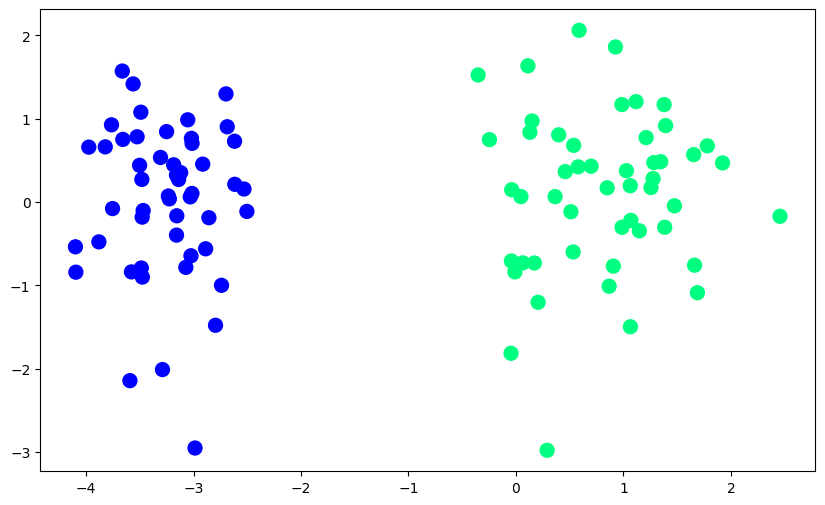

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver = 'sag')
lor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [13]:
print(lor.coef_)
print(lor.intercept_)

[[4.90194096 0.23403014]]
[5.85346263]


In [54]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [55]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

# The main function.

- Important part and the main idea is caluclation the weights.

In [131]:
def gd(X,y):

  X = np.insert(X,0,1,axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(3000):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0]) #main part of this function

  return weights[1:],weights[0]

In [132]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [133]:
coef_,intercept_ = gd(X,y)

In [134]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [135]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 +b

(-3.0, 2.0)

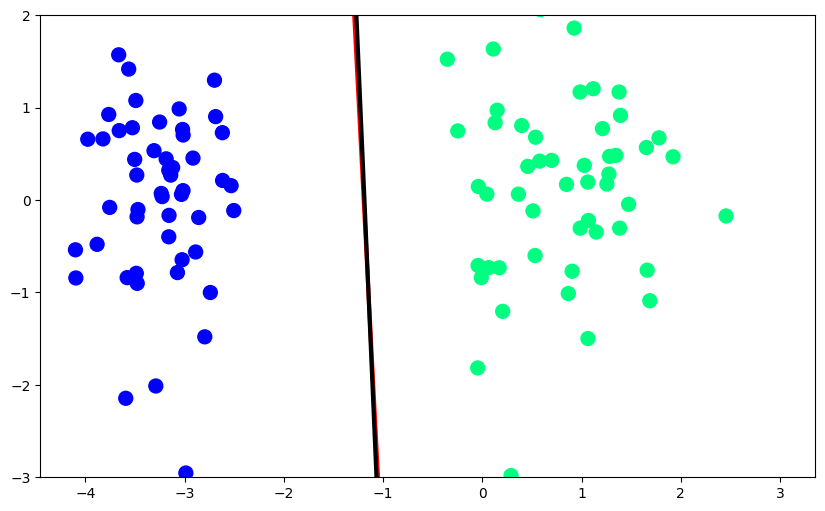

In [136]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color = 'red',linewidth=3)
plt.plot(x_input1,y_input1,color = 'black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s = 100)
plt.ylim(-3,2)

#Comparsion of the pre build logistic regssion(red) and our build by formulation(black).